<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module09/network_models.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Models

## Introduction

So far in the course, we have studied various structures to model the place and relationships between elements. For example, we employed 2D grids and cell proximity to represent the location and connection between cells, respectively, in the cellular automaton models and the agent-based simulations reviewed. This module will explore a different structure to model complex phenomena: network models. 

In preparation for the live session, please watch the following video to learn about the importance of networks in our lives.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/RfgjHoVCZwU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Concepts

You will find a list of important concepts we will review in the module below.

- Edges
- Network models
- Networks
- Nodes

## Interaction

In this module, we will explore and analyze the web browsing pattern of a person using a network model.

In [ ]:
!pip install python-louvain

In [65]:
import pandas as pd

In [66]:
import networkx as nx

In [67]:
import matplotlib.pyplot as plt

In [68]:
import community

In [69]:
data = pd.read_excel('module09_data.xlsx', sheet_name='data')

In [70]:
data

id     prev_id  panelist_id              used_at  \
0     1009106048           0            1  2018-10-01 10:33:01   
1     1009106052  1009106048            1  2018-10-01 10:33:39   
2     1009106056  1009106052            1  2018-10-01 10:33:53   
3     1009106060  1009106056            1  2018-10-01 10:34:07   
4     1009106064  1009106060            1  2018-10-01 10:34:39   
...          ...         ...          ...                  ...   
8041  1092165015  1092165011         1137  2018-10-30 23:08:03   
8042  1092165019  1092165015         1137  2018-10-30 23:08:07   
8043  1092165023  1092165019         1137  2018-10-30 23:09:13   
8044  1092165027  1092165023         1137  2018-10-30 23:09:33   
8045  1092165031  1092165027         1137  2018-10-30 23:10:11   

                  left_at  active_seconds  top_level_domain  \
0     2018-10-01 10:33:39              38         myway.com   
1     2018-10-01 10:33:53              14  deutsche-bank.de   
2     2018-10-01 10:34:07              14  deutsche-bank.de   
3     2018-10-01 10:34:39              32  deutsche-bank.de   
4     2018-10-01 10:35:45              66  deutsche-bank.de   
...                   ...             ...               ...   
8041  2018-10-30 23:08:07               4       youtube.com   
8042  2018-10-30 23:09:13              66      facebook.com   
8043  2018-10-30 23:09:33              20      facebook.com   
8044  2018-10-30 23:10:11              38       youtube.com   
8045  2018-10-30 23:10:34              23      facebook.com   

                       category1            category2 category3  
0     search-engines and portals                  NaN       NaN  
1                       business  economy and finance       NaN  
2                       business  economy and finance       NaN  
3                       business  economy and finance       NaN  
4                       business  economy and finance       NaN  
...                          ...                  ...       ...  
8041               entertainment      streaming-media       NaN  
8042           social-networking                  NaN       NaN  
8043           social-networking                  NaN       NaN  
8044               entertainment      streaming-media       NaN  
8045           social-networking                  NaN       NaN  

[8046 rows x 10 columns]

In [71]:
panelist_ids = data.groupby('panelist_id').size().reset_index(name='Counts')

In [72]:
panelist_ids

panelist_id  Counts
0            1    4453
1         1137    3593

In [73]:
user_data = data[data['panelist_id'] == 1137]

In [74]:
user_data

id     prev_id  panelist_id              used_at  \
4453  1012622516           0         1137  2018-10-01 17:15:45   
4454  1012622520  1012622516         1137  2018-10-01 17:15:57   
4455  1012622524  1012622520         1137  2018-10-01 17:15:59   
4456  1012622528  1012622524         1137  2018-10-01 17:16:09   
4457  1012622532  1012622528         1137  2018-10-01 17:16:13   
...          ...         ...          ...                  ...   
8041  1092165015  1092165011         1137  2018-10-30 23:08:03   
8042  1092165019  1092165015         1137  2018-10-30 23:08:07   
8043  1092165023  1092165019         1137  2018-10-30 23:09:13   
8044  1092165027  1092165023         1137  2018-10-30 23:09:33   
8045  1092165031  1092165027         1137  2018-10-30 23:10:11   

                  left_at  active_seconds top_level_domain          category1  \
4453  2018-10-01 17:15:57              12     facebook.com  social-networking   
4454  2018-10-01 17:15:59               2     facebook.com  social-networking   
4455  2018-10-01 17:16:09              10     facebook.com  social-networking   
4456  2018-10-01 17:16:13               4     facebook.com  social-networking   
4457  2018-10-01 17:16:19               6     facebook.com  social-networking   
...                   ...             ...              ...                ...   
8041  2018-10-30 23:08:07               4      youtube.com      entertainment   
8042  2018-10-30 23:09:13              66     facebook.com  social-networking   
8043  2018-10-30 23:09:33              20     facebook.com  social-networking   
8044  2018-10-30 23:10:11              38      youtube.com      entertainment   
8045  2018-10-30 23:10:34              23     facebook.com  social-networking   

            category2 category3  
4453              NaN       NaN  
4454              NaN       NaN  
4455              NaN       NaN  
4456              NaN       NaN  
4457              NaN       NaN  
...               ...       ...  
8041  streaming-media       NaN  
8042              NaN       NaN  
8043              NaN       NaN  
8044  streaming-media       NaN  
8045              NaN       NaN  

[3593 rows x 10 columns]

In [75]:
visited_categories = user_data.groupby('category1').size().reset_index(name='Counts')

In [76]:
visited_categories

category1  Counts
0                 advertising       1
1                    business     622
2               entertainment    1170
3            information-tech       8
4              news and media      11
5  search-engines and portals      20
6                    shopping     242
7           social-networking    1519

In [77]:
visited_domains = user_data.groupby('top_level_domain').size().reset_index(name='Counts')

In [78]:
visited_domains

top_level_domain  Counts
0              action.com       9
1            aldi-sued.de       3
2          aliexpress.com      63
3              alipay.com       5
4               amazon.de      90
5          autoscout24.de      23
6             avature.net       8
7            banggood.com       1
8          bastel-welt.de       1
9           beemybear.com       7
10                bild.de       6
11                 bit.ly       1
12         buttinette.com       2
13            carnext.com       1
14    creartive-corner.de      38
15           derwesten.de       2
16        doreenbeads.com       1
17        doubleclick.net       1
18  ebay-kleinanzeigen.de      17
19                ebay.de      67
20               etsy.com      16
21             eventim.de       3
22           facebook.com    1506
23         faltkarten.com       1
24              google.de      20
25             groupon.de       1
26   immobilienscout24.de      32
27          instagram.com      13
28         kreativbunt.de     209
29        leasingmarkt.de       4
30            meinauto.de       3
31             nbeads.com       7
32                otto.de       1
33             paypal.com      12
34            rossmann.de       4
35         scrapabilly.de      16
36               shoop.de       1
37       sixt-neuwagen.de       5
38          skoda-auto.de       5
39            smarter.com       5
40             spiegel.de       1
41          stampinup.com     105
42    stationeryheaven.nl       8
43       stempelmuehle.de      13
44               supr.com      23
45           telegram.org      17
46          vbs-hobby.com      31
47                 waz.de       2
48               wish.com      13
49            youtube.com    1170

In [79]:
visits_dictonary = {
    'start_node': [],
    'end_node': []
}

for index, row in user_data.iterrows():
    
    record = user_data.loc[user_data['prev_id'] == row['id']]
    
    if (len(record)>0):
        visits_dictonary['start_node'].append(row['top_level_domain'])
        visits_dictonary['end_node'].append(record.iloc[0]['top_level_domain'])

In [80]:
visits_dataframe = pd.DataFrame.from_dict(visits_dictonary)

In [81]:
visits_dataframe

start_node      end_node
0     facebook.com  facebook.com
1     facebook.com  facebook.com
2     facebook.com  facebook.com
3     facebook.com  facebook.com
4     facebook.com  facebook.com
...            ...           ...
3587  facebook.com   youtube.com
3588   youtube.com  facebook.com
3589  facebook.com  facebook.com
3590  facebook.com   youtube.com
3591   youtube.com  facebook.com

[3592 rows x 2 columns]

In [82]:
visits_dataframe_grouped = visits_dataframe.groupby(['start_node','end_node']).size().reset_index(name='count')

In [83]:
visits_dataframe_grouped

start_node       end_node  count
0      action.com     action.com      3
1      action.com   facebook.com      1
2      action.com    youtube.com      5
3    aldi-sued.de   aldi-sued.de      2
4    aldi-sued.de    youtube.com      1
..            ...            ...    ...
176   youtube.com   telegram.org     10
177   youtube.com  vbs-hobby.com     12
178   youtube.com         waz.de      1
179   youtube.com       wish.com      5
180   youtube.com    youtube.com    538

[181 rows x 3 columns]

In [84]:
G = nx.Graph()

In [85]:
for index, row in visits_dataframe_grouped.iterrows():
    if (row['start_node']!=row['end_node'] and row['count']>0):
        if (not G.has_node(row['start_node'])):
            G.add_node(row['start_node'])
        if (not G.has_node(row['end_node'])):
            G.add_node(row['end_node'])
        G.add_edge(row['start_node'],row['end_node'])

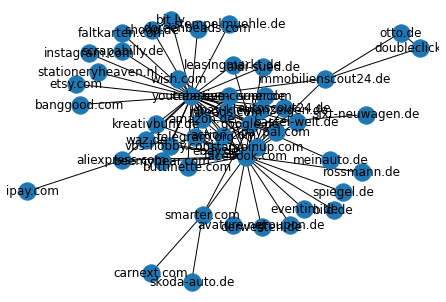

In [86]:
nx.draw(G,with_labels=True)

In [88]:
fig = plt.figure(1, figsize=(50, 50), dpi=200)

nx.draw(G, with_labels=True, node_color='lightblue', font_weight='normal', node_size=1500, width=1)

In [89]:
fig = plt.figure(1, figsize=(50, 50), dpi=200)

# Compute the best partition
partition = community.best_partition(G)

# Visualize the communities
pos = nx.spring_layout(G)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

nx.draw_networkx_labels(G, pos, labels=labels)

cmap = plt.cm.get_cmap('jet', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=1000, cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [90]:
# Print communities
for i, com in enumerate(set(partition.values())):
    members = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(f"Community {i}: {members}")

Community 0: ['action.com', 'aldi-sued.de', 'google.de', 'autoscout24.de', 'ebay-kleinanzeigen.de', 'paypal.com', 'supr.com', 'leasingmarkt.de', 'meinauto.de', 'nbeads.com', 'sixt-neuwagen.de', 'wish.com']
Community 1: ['amazon.de', 'creartive-corner.de', 'ebay.de', 'stampinup.com', 'telegram.org', 'vbs-hobby.com']
Community 2: ['carnext.com', 'smarter.com', 'skoda-auto.de']
Community 3: ['facebook.com', 'aliexpress.com', 'alipay.com', 'avature.net', 'bastel-welt.de', 'beemybear.com', 'bild.de', 'buttinette.com', 'derwesten.de', 'eventim.de', 'groupon.de', 'kreativbunt.de', 'rossmann.de', 'spiegel.de']
Community 4: ['doubleclick.net', 'otto.de', 'immobilienscout24.de']
Community 5: ['youtube.com', 'banggood.com', 'bit.ly', 'shoop.de', 'doreenbeads.com', 'etsy.com', 'waz.de', 'faltkarten.com', 'instagram.com', 'scrapabilly.de', 'stationeryheaven.nl', 'stempelmuehle.de']


In [91]:
# Calculate and print basic metrics
print("Degree Centrality:", nx.degree_centrality(G))

Degree Centrality: {'action.com': 0.061224489795918366, 'facebook.com': 0.5918367346938775, 'youtube.com': 0.6938775510204082, 'aldi-sued.de': 0.04081632653061224, 'aliexpress.com': 0.061224489795918366, 'alipay.com': 0.02040816326530612, 'amazon.de': 0.1020408163265306, 'creartive-corner.de': 0.061224489795918366, 'google.de': 0.3469387755102041, 'autoscout24.de': 0.061224489795918366, 'avature.net': 0.02040816326530612, 'banggood.com': 0.02040816326530612, 'bastel-welt.de': 0.04081632653061224, 'beemybear.com': 0.04081632653061224, 'bild.de': 0.02040816326530612, 'bit.ly': 0.04081632653061224, 'shoop.de': 0.04081632653061224, 'buttinette.com': 0.04081632653061224, 'carnext.com': 0.02040816326530612, 'smarter.com': 0.08163265306122448, 'derwesten.de': 0.02040816326530612, 'doreenbeads.com': 0.02040816326530612, 'doubleclick.net': 0.04081632653061224, 'otto.de': 0.04081632653061224, 'ebay-kleinanzeigen.de': 0.061224489795918366, 'ebay.de': 0.1020408163265306, 'stampinup.com': 0.0612244

In [92]:
print("Betweenness Centrality:", nx.betweenness_centrality(G))

Betweenness Centrality: {'action.com': 0.0, 'facebook.com': 0.4307681405895691, 'youtube.com': 0.5294075963718821, 'aldi-sued.de': 0.0, 'aliexpress.com': 0.04081632653061224, 'alipay.com': 0.0, 'amazon.de': 0.0011337868480725622, 'creartive-corner.de': 0.0, 'google.de': 0.14647108843537415, 'autoscout24.de': 0.0, 'avature.net': 0.0, 'banggood.com': 0.0, 'bastel-welt.de': 0.0, 'beemybear.com': 0.0, 'bild.de': 0.0, 'bit.ly': 0.0, 'shoop.de': 0.0, 'buttinette.com': 0.0, 'carnext.com': 0.0, 'smarter.com': 0.08078231292517006, 'derwesten.de': 0.0, 'doreenbeads.com': 0.0, 'doubleclick.net': 0.0, 'otto.de': 0.0, 'ebay-kleinanzeigen.de': 0.0, 'ebay.de': 0.0011337868480725622, 'stampinup.com': 0.0, 'telegram.org': 0.0016298185941043082, 'etsy.com': 0.0, 'eventim.de': 0.0, 'groupon.de': 0.0, 'immobilienscout24.de': 0.07993197278911564, 'kreativbunt.de': 0.0, 'paypal.com': 0.0, 'rossmann.de': 0.0, 'spiegel.de': 0.0, 'supr.com': 0.0, 'waz.de': 0.0, 'faltkarten.com': 0.0, 'leasingmarkt.de': 0.0, 'm

In [93]:
print("Closeness Centrality:", nx.closeness_centrality(G))

Closeness Centrality: {'action.com': 0.49, 'facebook.com': 0.7101449275362319, 'youtube.com': 0.7424242424242424, 'aldi-sued.de': 0.4537037037037037, 'aliexpress.com': 0.48514851485148514, 'alipay.com': 0.3288590604026846, 'amazon.de': 0.5, 'creartive-corner.de': 0.4803921568627451, 'google.de': 0.5833333333333334, 'autoscout24.de': 0.49, 'avature.net': 0.4188034188034188, 'banggood.com': 0.4298245614035088, 'bastel-welt.de': 0.47572815533980584, 'beemybear.com': 0.47572815533980584, 'bild.de': 0.4188034188034188, 'bit.ly': 0.4336283185840708, 'shoop.de': 0.4336283185840708, 'buttinette.com': 0.47572815533980584, 'carnext.com': 0.3161290322580645, 'smarter.com': 0.45794392523364486, 'derwesten.de': 0.4188034188034188, 'doreenbeads.com': 0.4298245614035088, 'doubleclick.net': 0.3356164383561644, 'otto.de': 0.3356164383561644, 'ebay-kleinanzeigen.de': 0.49, 'ebay.de': 0.5, 'stampinup.com': 0.4803921568627451, 'telegram.org': 0.5051546391752577, 'etsy.com': 0.4298245614035088, 'eventim.de

## Recommended Readings

## Optional Readings

You will find additional resources in case you would like to continue exploring the topics covered in this module below.